In [6]:
###Calculate APOGEE field mass with PARSEC isochrones
import astropy
from astropy.io import fits, ascii
from astropy.table import Table
import numpy as np
import statsmodels.api as sm 



def parsec_apogee_field_mass(age,metallicity,maxabsH,parsec_path):
    
    """
    This is used to calculate the mass of stars in a field
    - star: APOGEE_ID of star to use to create an inlist file for
    - maxabsH: max value of H for the field 
    - apogee_path: fits file to apogee data
    - parsec_path: fits file that contains data using Nidever/APOGEE naming convention for columns
    """
    
    ###Load in isochrones from parsec
    parsecall = ascii.read(parsec_path, format='basic', delimiter='\s')
    rgb = np.where(parsecall['label']==3)
    parsec = parsecall[rgb]
    
    #find closest parsec isochrone z fraction
    age = np.log10(age)
    parsec_mets = np.unique(np.asarray((np.log10(parsec['Zini']/0.02))))
    met_index = np.absolute(parsec_mets-metallicity*np.ones(len(parsec_mets))).argmin()
    z_iso = 0.02*(10**parsec_mets[met_index])
    
    #find closest parsec isochrone age
    parsec_ages = np.unique(np.asarray(parsec['logAge']))
    age_index = np.absolute(parsec_ages-age*np.ones(len(parsec_ages))).argmin()
    age_iso = parsec_ages[age_index]
    
    #pick out isochrone with range
    single_iso = np.where((parsec['Zini']==z_iso)&(parsec['logAge']==age_iso)&(parsec['Hmag']<=maxabsH))
    
    #fit IMF interpolation to isochrone picked out above
    x = parsec[single_iso]['Hmag']
    y = parsec[single_iso]['int_IMF']
    x = sm.add_constant(x)

    model = sm.OLS(y,x)
    results = model.fit()
    results.params
    results.summary()
    
    #model for interpolation of IMF and generate new IMF points
    def IMF(mag):
        results.params[0]+results.params[1]*mag
        return 
    h = np.linspace(min(parsec[single_iso]['Hmag']),max(parsec[single_iso]['Hmag']),50)
    new_IMF = IMF(h)
    
    #calculate the difference between IMF points
    new_IMF2 = new_IMF.append(new_IMF[-1])
    diff_in_IMF = []
    for i in range(len(new_IMF)):
        diff_in_IMF.append(new_IMF2[i+1]-new_IMF2[i])
    

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
parsecall = ascii.read('/Users/joshpovick/Desktop/Research/Magellanic_Ages/logisochrones.dat',format='basic', delimiter='\s')
rgb = np.where(parsecall['label']==3)
parsec = parsecall[rgb]

In [141]:
parsec.columns

<TableColumns names=('Zini','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Jmag','Hmag','Ksmag')>

In [165]:
r = []
t = [1,2,5,8,8]
s = [1,2,5,8]
for i in range(len(s)):
    r.append(t[i+1]-t[i])
    
print(r)

[1, 3, 3, 0]


In [131]:
set(parsec['logAge'])

{8.0,
 8.15,
 8.3,
 8.45,
 8.6,
 8.75,
 8.9,
 9.05,
 9.2,
 9.35,
 9.5,
 9.65,
 9.8,
 9.95,
 10.1}

In [136]:
age = 9.15

parsec_ages = np.unique(np.asarray(parsec['logAge']))
age_index = np.absolute(parsec_ages-age*np.ones(len(parsec_ages))).argmin()
    
age_iso = parsec_ages[age_index]

print(age_iso)

9.2


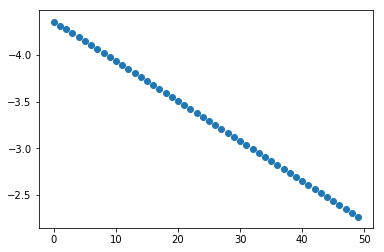

In [163]:
plt.scatter(np.arange(50), np.linspace(min(parsec[test_iso]['Hmag']),max(parsec[test_iso]['Hmag']),50))
plt.gca().invert_yaxis()

In [138]:
metallicity  = -0.3

parsec_mets = np.unique(np.asarray((np.log10(parsec['Zini']/0.02))))
met_index = np.absolute(parsec_mets-metallicity*np.ones(len(parsec_mets))).argmin()
    
z_iso = 0.02*(10**parsec_mets[met_index])

print(parsec_mets[met_index])

-0.25289906863501377


In [140]:
z = 0.02*10**(-0.25289906863501377)

test_iso = np.where((parsec['Zini']==z)&(parsec['logAge']==8.6))

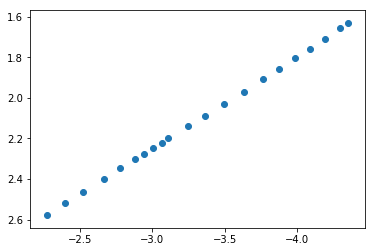

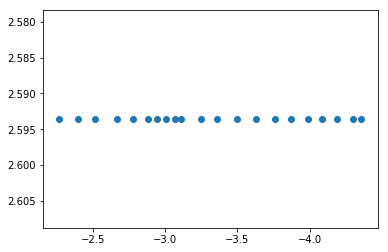

In [158]:
plt.scatter(parsec[test_iso]['Hmag'],parsec[test_iso]['logg'])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

plt.scatter(parsec[test_iso]['Hmag'],parsec[test_iso]['int_IMF'])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
############################################
### Create a list of all possible models ###
############################################

import itertools as it

x = parsec['logTe']
y = parsec['Ksmag']

models = []
all_var = [x,y]
for i in range(4, len(all_var)+1):
    for subset in it.combinations(all_var,i):
        models.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        models_str.append(np.array(subset_str))
    
idx = []
for j in range(len(models_str)):
    if models_str[j][0]=='y1' and models_str[j][1]=='y2' and models_str[j][2]=='y3' and models_str[j][3]=='y4':
        idx.append(j)
        
models = np.array(models)[idx]
models_str_good = np.array(models_str)[idx]

In [152]:
######################
### Fit All Models ###
######################

import statsmodels.api as sm 

x = parsec[test_iso]['Hmag']
y = parsec[test_iso]['int_IMF']

x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.177e+04
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           5.32e-28
Time:                        13:17:45   Log-Likelihood:                 258.87
No. Observations:                  21   AIC:                            -513.7
Df Residuals:                      19   BIC:                            -511.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5934   1.32e-06   1.96e+06      0.000       2.593       2.593
x1         -4.236e-05    3.9e-07   -108.491      0.000   -4.32e-05   -4.15e-05
==============================================================================
Omnibus:                       16.981   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.304
Skew:                           1.739   Prob(JB):                     0.000175
Kurtosis:                       5.771   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
def test_imf(mag):
    return results.params[0]+results.params[1]*mag

In [157]:
test_imf(-1.5)

2.59350271060034

(array([ 481., 1760., 2032., 2212., 2885., 2726., 1822., 1239.,  767.,
         197.]),
 array([-6.665 , -5.8131, -4.9612, -4.1093, -3.2574, -2.4055, -1.5536,
        -0.7017,  0.1502,  1.0021,  1.854 ]),
 <a list of 10 Patch objects>)

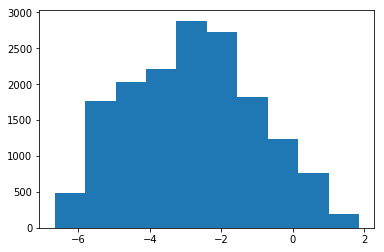

In [13]:
plt.hist(parsec['Hmag'])

In [82]:
np.absolute(np.unique(np.asarray(parsec['Zini']))-(0.02*(10**-3))*np.ones(len(np.unique(np.asarray(parsec['Zini'])))))


np.unique(np.asarray(parsec['Zini']))

3.9311e-05

In [107]:
np.round(np.copy(np.unique(np.asarray(np.log10(parsec['Zini']/0.02)))))
diff = np.absolute(test+0.3*np.ones(len(test))).argmin()
print(-0.3)
print(test)

-0.3
[-3. -3. -3. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -0. -0. -0. -0. -0.]


In [105]:
print(np.abs(-0.3+0.34817))
print(np.abs(-0.3+0.2529))

# np.unique(np.asarray(parsec['Zini']))[np.abs(np.unique(np.asarray(parsec['Zini']))-(0.02*(10**-3))*np.ones(len(np.unique(np.asarray(parsec['Zini']))))).argmin()]

0.04816999999999999
0.047099999999999975


In [78]:
len(parsec['Zini'])

16121

(2.5935, 2.5937)

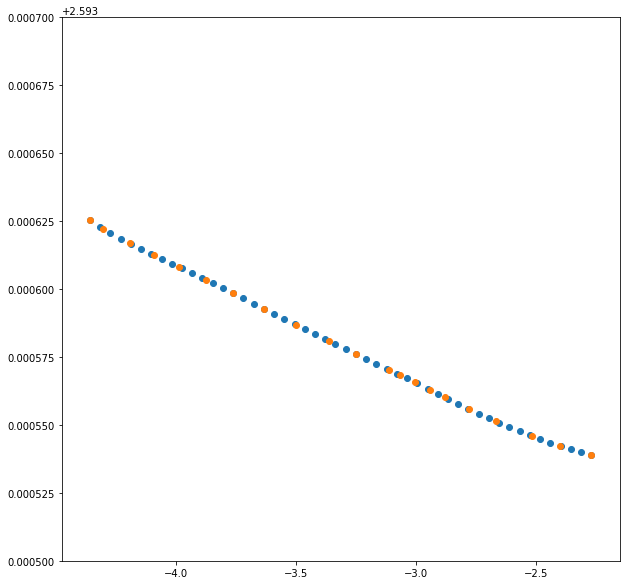

In [180]:
from scipy.interpolate import interp1d


f = interp1d(parsec[test_iso]['Hmag'],parsec[test_iso]['int_IMF'],kind='cubic',bounds_error=True,fill_value=(np.nan,np.nan),assume_sorted=False)
y = f(np.linspace(min(parsec[test_iso]['Hmag']),max(parsec[test_iso]['Hmag']),50))

plt.figure(figsize=[10,10])
plt.scatter(np.linspace(min(parsec[test_iso]['Hmag']),max(parsec[test_iso]['Hmag']),50), f(np.linspace(min(parsec[test_iso]['Hmag']),max(parsec[test_iso]['Hmag']),50)))
plt.scatter(parsec[test_iso]['Hmag'],parsec[test_iso]['int_IMF'])
plt.ylim(2.59350,2.5937)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``.  This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Note that calling `interp1d` with NaNs present in input values results in
 |  undefined behaviour.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string
 |      ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
 |      